
# Project: No-show appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>




### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv' )
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

Check if there is duplication in data

In [5]:
df.duplicated().sum()

0

to know how many patient that used to show up, i will search for how many unique id patient that we have

In [6]:
df['PatientId'].nunique()

62299

there is only 62299 unique values from 110527 , so now let us figuer out how many duplecate values we have

In [7]:
df['PatientId'].duplicated().sum()

48228

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From this statistical data we can note that the mean os age is 37 and max is 115 amd min is -1 that is make no sense to have .. so we will fix it

 looking for any missing values 

In [9]:
#find if there is missing data or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data..


### Data Cleaning
 

It doesn't make sense for someone to be his age -1

In [10]:
df['Age']=df['Age'].apply(float)
df["Age"].mask(df['Age'] <= 0, inplace = True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,106987.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,38.316085,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,22.466214,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now we have the min. age is 1 year...

we can note that there is some column names that is spelling mistake

In [11]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


Removing duplecates patient ids that have duplicate show up ,cause the same patient may have many appointement but doesn't show up every one..

In [12]:
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.shape

(71817, 14)

I will drop columns that will not help me in my analysis..

In [13]:
df.drop(['PatientId' , 'AppointmentID' ,'ScheduledDay' , 'AppointmentDay'], axis=1 , inplace = True)

In [14]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,69415.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000
mean,37.790953,0.095534,0.195065,0.070958,0.025036,0.020135,0.335561
std,22.753023,0.293954,0.396254,0.256757,0.156235,0.155337,0.472190
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 visualeyes the data in histogram...

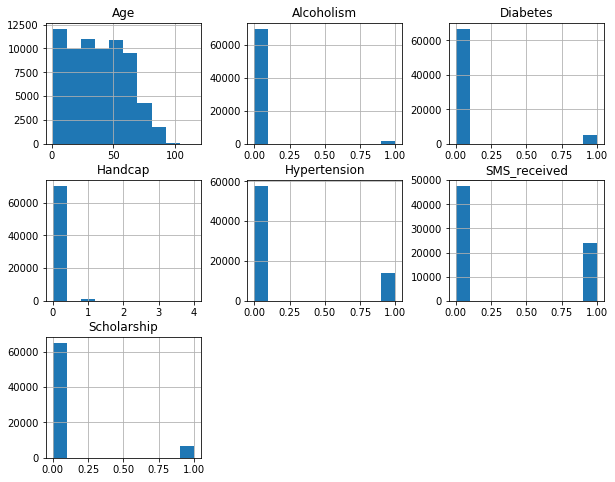

In [16]:
df.hist(figsize=(10,8));

Then i want make mask to the column (No show)

In [17]:
df['No-show'] = df['No-show'].str.strip()

In [18]:
df['No-show'].head()

0    No
1    No
2    No
3    No
4    No
Name: No-show, dtype: object

In [19]:
showedup = df['No-show'] == "No"
didntshowedup = df['No-show'] == "Yes"

In [20]:
df[showedup].count(),df[didntshowedup].count()

(Gender           54154
 Age              52325
 Neighbourhood    54154
 Scholarship      54154
 Hypertension     54154
 Diabetes         54154
 Alcoholism       54154
 Handcap          54154
 SMS_received     54154
 No-show          54154
 dtype: int64, Gender           17663
 Age              17090
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No-show          17663
 dtype: int64)

We cane note that no. of patient that show up is 54154 and no showup is 17663..

the average of showing up and not is

In [21]:
df[showedup].mean(),df[didntshowedup].mean()

(Age             38.529785
 Scholarship      0.091332
 Hypertension     0.202940
 Diabetes         0.072866
 Alcoholism       0.023599
 Handcap          0.020903
 SMS_received     0.297226
 dtype: float64, Age             35.528847
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

we can note that the patient that recived a sms and show up is 29% ,and that whoes have sms message and not show up is 45% ,so we have to review it

<a id='eda'></a>
## Exploratory Data Analysis

>Now let's find out how each of Gender,	Age	,Neighbourhood	,Scholarship ,Hipertension,	Diabetes ,Alcoholism,Handcap and	SMS_received affects  a patient will show up for their scheduled appointment
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Does age affect if patient show up or not??

In [22]:
df.Age[showedup].mean()

38.52978499761108

In [23]:
df.Age[didntshowedup].mean()

35.52884727911059

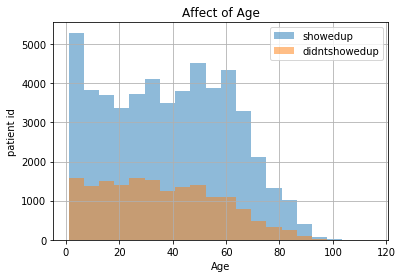

In [24]:
df.Age[showedup].hist(alpha=0.5,bins=20,label='showedup')
df.Age[didntshowedup].hist(alpha=0.5,bins=20,label='didntshowedup')
plt.legend();
plt.title('Affect of Age')
plt.xlabel("Age")
plt.ylabel('patient id');

so we can note that the pepol in age from 1 to 7 is the highest show up and thos who bigger than 95 is has the less show up in their appointments..

Does Age and Hypertension affects on showing up together?

,Age,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received
Hypertension,,,,,,
0,32.477610,0.095126,0.016912,0.017654,0.014410,0.295431
1,61.292903,0.076433,0.292630,0.046952,0.046406,0.304277


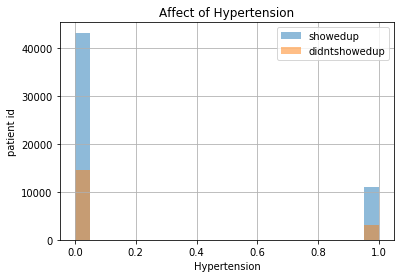

In [25]:
df.Hypertension[showedup].hist(alpha=0.5,bins=20,label='showedup')
df.Hypertension[didntshowedup].hist(alpha=0.5,bins=20,label='didntshowedup')
plt.legend();
plt.title('Affect of Hypertension')
plt.xlabel("Hypertension")
plt.ylabel('patient id');
df[showedup].groupby(['Hypertension']).mean()

let us now visualeyes the data

we can note that the peoprl whoes haven't hypertension there average age is 32 and most of them doesn't show up,and th peopel who has hypertention there average age is 61 and most of them doesn't show up too..

Does Age and Diabetes affects on showing up together?

,Age,Scholarship,Hypertension,Alcoholism,Handcap,SMS_received
Diabetes,,,,,,
0,36.623390,0.093232,0.154836,0.022486,0.018344,0.298399
1,61.902686,0.067157,0.815003,0.037760,0.053472,0.282311


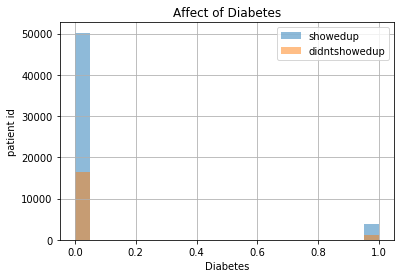

In [26]:
df.Diabetes[showedup].hist(alpha=0.5,bins=20,label='showedup')
df.Diabetes[didntshowedup].hist(alpha=0.5,bins=20,label='didntshowedup')
plt.legend();
plt.title('Affect of Diabetes')
plt.xlabel("Diabetes")
plt.ylabel('patient id');
df[showedup].groupby(['Diabetes']).mean()

we can note that the peoprl whoes haven't Diabetes there average age is 36 and most of them doesn't show up,and th peopel who has Diabetes there average age is 61 and most of them doesn't show up too..

Does gender affects the pationt show up or not

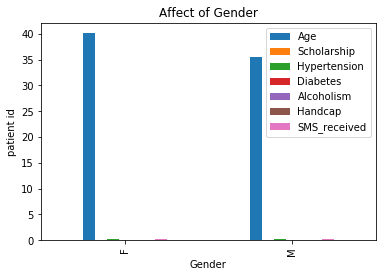

In [27]:
df[showedup].groupby(['Gender']).mean().plot(kind='bar');
plt.title('Affect of Gender')
plt.xlabel("Gender")
plt.ylabel('patient id');

We can note the the Gender has no affect of showing up..

Does receiving  SMS affects the pationt show up or not?

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap
SMS_received,,,,,,
0,36.356281,0.102174,0.183230,0.073188,0.031884,0.02060
1,34.545210,0.115957,0.156066,0.055354,0.026490,0.01437


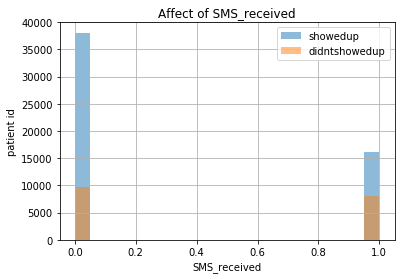

In [28]:
df.SMS_received[showedup].hist(alpha=0.5,bins=20,label='showedup')
df.SMS_received[didntshowedup].hist(alpha=0.5,bins=20,label='didntshowedup')
plt.legend();
plt.title('Affect of SMS_received')
plt.xlabel("SMS_received")
plt.ylabel('patient id');
df[showedup].groupby(['SMS_received']).mean()
df[didntshowedup].groupby(['SMS_received']).mean()

we can note that the peopel who hasnot recived sms and didn't show up is more than who showed up

Does neighbourhood affects the pationt show up or not?

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
Neighbourhood,,,,,,,
AEROPORTO,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ANDORINHAS,35.437326,0.173442,0.219512,0.119241,0.021680,0.032520,0.363144
ANTÔNIO HONÓRIO,29.027027,0.125000,0.000000,0.000000,0.000000,0.000000,0.450000
ARIOVALDO FAVALESSA,35.549020,0.096154,0.173077,0.076923,0.019231,0.019231,0.307692
BARRO VERMELHO,42.985294,0.000000,0.147059,0.102941,0.014706,0.000000,0.382353


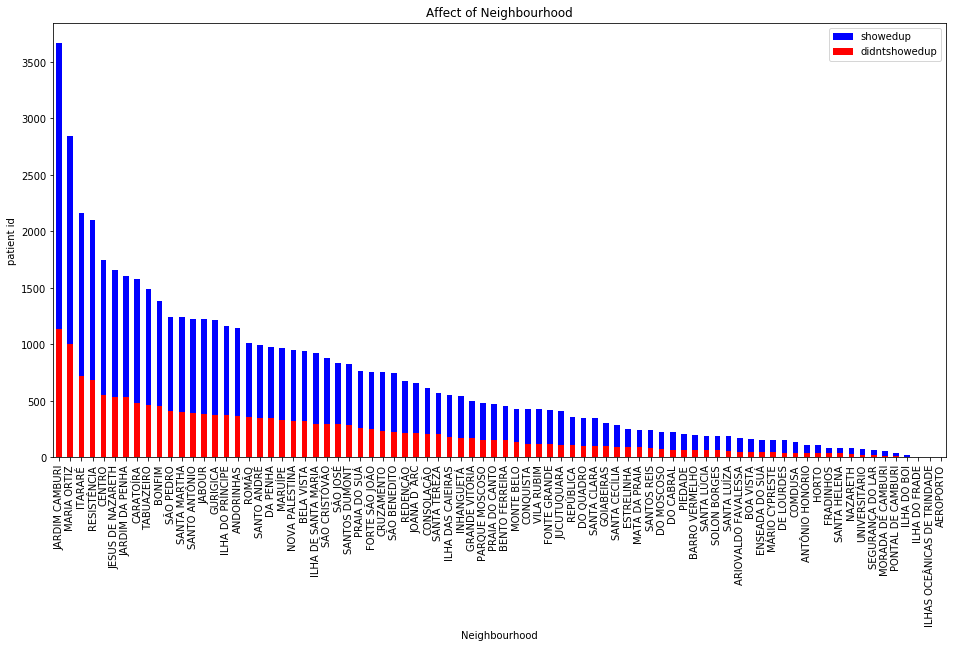

In [29]:
df.Neighbourhood[showedup].value_counts().plot(kind='bar',figsize=(16,8),color='blue',label='showedup')
df.Neighbourhood[didntshowedup].value_counts().plot(kind='bar',color='red',label='didntshowedup')
plt.legend();
plt.title('Affect of Neighbourhood')
plt.xlabel("Neighbourhood")
plt.ylabel('patient id');
df[showedup].groupby(['Neighbourhood']).mean().head()
df[didntshowedup].groupby(['Neighbourhood']).mean().head()

The Neighbourhood have a very great affect on patient show up or no , for example the Neighbourhood Jardim Camburl has the most patients ..

doed the peopel who have the Scholarship make any difference in ther show up or not

,Age,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
Scholarship,,,,,,
0,36.273218,0.173419,0.066993,0.026289,0.018542,0.449263
1,29.605870,0.150392,0.049608,0.055352,0.011488,0.484595


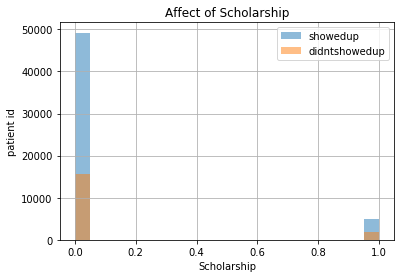

In [30]:
df.Scholarship[showedup].hist(alpha=0.5,bins=20,label='showedup')
df.Scholarship[didntshowedup].hist(alpha=0.5,bins=20,label='didntshowedup')
plt.legend();
plt.title('Affect of Scholarship')
plt.xlabel("Scholarship")
plt.ylabel('patient id');
df[showedup].groupby(['Scholarship']).mean()
df[didntshowedup].groupby(['Scholarship']).mean()

we can note that ther is 36% have no scholarship but most of then have been showed up in thet apoitment,but ther is 29% who have scholarship but they have alitle percentage of ther showed up..

does Alcoholism affect show up or not??

,Age,Scholarship,Hypertension,Diabetes,Handcap,SMS_received
Alcoholism,,,,,,
0,35.158781,0.105524,0.164849,0.064108,0.017675,0.454471
1,47.321154,0.203846,0.371154,0.098077,0.021154,0.407692


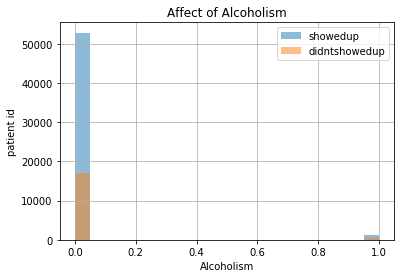

In [31]:
df.Alcoholism[showedup].hist(alpha=0.5,bins=20,label='showedup')
df.Alcoholism[didntshowedup].hist(alpha=0.5,bins=20,label='didntshowedup')
plt.legend();
plt.title('Affect of Alcoholism')
plt.xlabel("Alcoholism")
plt.ylabel('patient id');
df[showedup].groupby(['Alcoholism']).mean()
df[didntshowedup].groupby(['Alcoholism']).mean()

Does Handcap affects on show up or not ?

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received
Handcap,,,,,,
0,35.300559,0.108944,0.166695,0.063561,0.029393,0.454300
1,49.380567,0.080972,0.429150,0.161943,0.028340,0.396761
2,52.259259,0.037037,0.518519,0.185185,0.074074,0.185185
3,32.666667,0.000000,0.333333,0.000000,0.000000,0.333333
4,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000


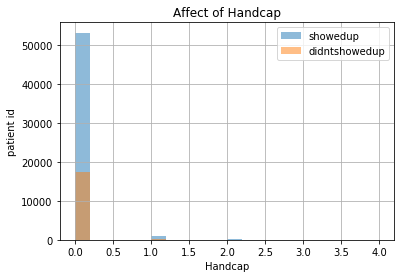

In [32]:
df.Handcap[showedup].hist(alpha=0.5,bins=20,label='showedup')
df.Handcap[didntshowedup].hist(alpha=0.5,bins=20,label='didntshowedup')
plt.legend();
plt.title('Affect of Handcap')
plt.xlabel("Handcap")
plt.ylabel('patient id');
df[showedup].groupby(['Handcap']).mean()
df[didntshowedup].groupby(['Handcap']).mean()

### Limitation
(1)there is 48228 duplicates in patient ids so we may have some patient that have more than one appointment or ther are some ids ther are repeated.
(2)The min of age is -1 and that is illogical.
(3) no. of patient that show up is 54154 and no showup is 17663 and it is a good ration..
(4) The avareadge of age of people that have Hypertension is 61 and and that doesn't is 32..
(5)The avareadge of age of people that have Diabetes is 61 and and that doesn't is 36..

### concolusin
In the end,we concluded that patients between the ages of 1 and 7 re the most attended , and that the gender difference ,male or female ,has no noticeable effect on attendance, but the dfference Neighbourhood has a significant effect on the attendance of patints

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0